## Confusion Matrix

- 분류 문제의 정확도를 어떻게 측정할 것인가?

In [1]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]])

- Accuracy(정확도) = $\frac{TP + TN}{TP + TN + FP + FN}$ = 1 - ERR
- Error Rate(오차율) = $\frac{FP + FN}{TP + TN + FP + FN}$
- Precision(정밀도) = $\frac{TP}{TP + FP}$
- Specificity(특이도) = $\frac{TN}{TN + FP}$
- Sensitivity(민감도 = Recall) = $\frac{TP}{TP + FP}$

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [5]:
sum(y_true == y_pred) / len(y_true)

0.75

In [7]:
# by sklearn
accuracy_score(y_true, y_pred)

0.75

### 균일하지 않은 Dataset에 대한 Metrics

- 14세 이하의 10만명당 암 발병 인원은 14.8, 약 0.015%
- 대학의 학사경고자 평균 비율 3%
- 하버드 입학 지원자의 합격률은 2%
- 이메일 수신자 중 2% 만이 물건을 구매

### 정밀도 (Precision)

- Precision(정밀도) = $\frac{TP}{TP + FP}$
- 긍정이라고 예측한 비율 중 진짜 긍정인 비율
- 긍정이라고 얼마나 잘 예측했는가?

In [8]:
from sklearn.metrics import precision_score

y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [10]:
sum((y_pred == 1) & (y_pred == y_true)) / sum(y_pred)

0.5

In [11]:
# by sklearn
precision_score(y_true, y_pred)

0.5

In [17]:
y_true = np.array([0, 1, 2, 0, 1, 2])
y_pred = np.array([0, 2, 1, 0, 0, 1])
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [1, 0, 1],
       [0, 2, 0]])

In [19]:
# 0, 1, 2 각각의 precision을 구해줌
precision_score(y_true, y_pred, average=None)

array([0.66666667, 0.        , 0.        ])

In [21]:
# 전체 (6개) 중 몇개나 맞췄는가(2개) = 2/6
precision_score(y_true, y_pred, average='micro')

0.3333333333333333

In [24]:
# average = None 값들을 평균냄 (개별값들의 평균)
precision_score(y_true, y_pred, average='macro')

0.2222222222222222

### 민감도(Sensitivity, Recall, True Positive Rate)

- 실제 긍정 데이터중 긍정이라고 예측한 비율, 반환율, 재현율
- Sensitivity(민감도 = Recall) = $\frac{TP}{TP + FP}$
- 얼마나 잘 긍정이라고 예측하였는가?

In [25]:
from sklearn.metrics import recall_score

y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [26]:
sum((y_true == 1) & (y_pred == y_true)) / sum(y_true)

1.0

In [27]:
recall_score(y_true, y_pred)

1.0

### 특이성 (Specificity, True Negative Rate)

- 부정을 얼마나 잘 부정이라고 인식하는가?
- 전체 부정 중 부정을 정확히 찾아낸 비율
- Specificity(특이도) = $\frac{TN}{TN + FP}$


### F1 Score(F-measure, F-score)

- Precision과 Recall가 통합된 측정지표
- Precision과 Recall의 조화평균
- F1 = $2\frac{precision * recall}{precision + recall}$

In [28]:
from sklearn.metrics import f1_score

y_pred = np.array([0, 1, 1, 0])
y_true = np.array([0, 1, 0, 0])

In [29]:
pre = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

In [30]:
2 * (pre * rec) / (pre + rec)

0.6666666666666666

In [32]:
# by sklearn
f1_score(y_true, y_pred)

0.6666666666666666

### Precision - Recall Curve

- 예측 확률 Threshold를 변화시켜 Precision/Recall 측정
- 시각화 할 때 유용하게 사용 가능

In [39]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(
    y_true, y_scores)

In [40]:
precision

array([0.5       , 0.66666667, 0.5       , 1.        , 1.        ])

In [41]:
recall

array([1. , 1. , 0.5, 0.5, 0. ])

In [42]:
thresholds

array([0.1 , 0.35, 0.4 , 0.8 ])

(0.0, 1.05)

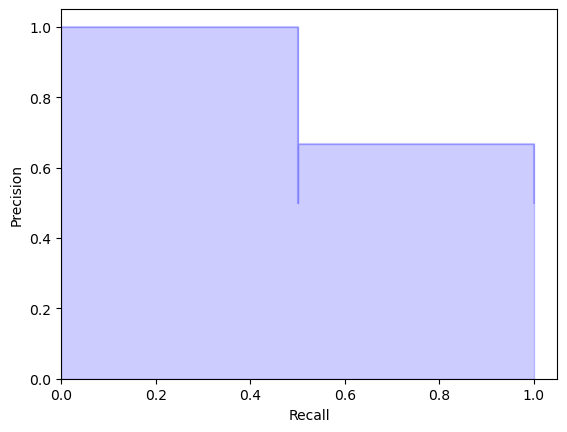

In [43]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])